In [3]:
!pip install kaggle
!mkdir /root/.kaggle
!echo '{"username":"michalgasiorowski","key":"64ed31a01f3f866630e66b5427dd6682"}' > /root/.kaggle/kaggle.json


In [4]:
!kaggle competitions download -c titanic

  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 9.99MB/s]
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 3.31MB/s]
  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 50.0MB/s]


In [9]:
!ls

gender_submission.csv  sample_data  test.csv  train.csv


In [0]:
import os
import pandas as pd

def load_titanic_dateset(titanic_path='/content'):
  gender_submission_csv_path = os.path.join(titanic_path, "gender_submission.csv")
  train_csv_path = os.path.join(titanic_path, "train.csv")
  test_csv_path = os.path.join(titanic_path, "test.csv")
  return pd.read_csv(gender_submission_csv_path), pd.read_csv(train_csv_path), pd.read_csv(test_csv_path)
  #return pd.read_csv


In [0]:
gender_sub, train, test = load_titanic_dateset()

In [34]:
train.describe(), train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


(       PassengerId    Survived      Pclass  ...       SibSp       Parch        Fare
 count   891.000000  891.000000  891.000000  ...  891.000000  891.000000  891.000000
 mean    446.000000    0.383838    2.308642  ...    0.523008    0.381594   32.204208
 std     257.353842    0.486592    0.836071  ...    1.102743    0.806057   49.693429
 min       1.000000    0.000000    1.000000  ...    0.000000    0.000000    0.000000
 25%     223.500000    0.000000    2.000000  ...    0.000000    0.000000    7.910400
 50%     446.000000    0.000000    3.000000  ...    0.000000    0.000000   14.454200
 75%     668.500000    1.000000    3.000000  ...    1.000000    0.000000   31.000000
 max     891.000000    1.000000    3.000000  ...    8.000000    6.000000  512.329200
 
 [8 rows x 7 columns], None)

In [36]:
train["Pclass"].value_counts(), train["SibSp"].value_counts()

(3    491
 1    216
 2    184
 Name: Pclass, dtype: int64, 0    608
 1    209
 2     28
 4     18
 3     16
 8      7
 5      5
 Name: SibSp, dtype: int64)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3249bd1da0>,
      dtype=object)

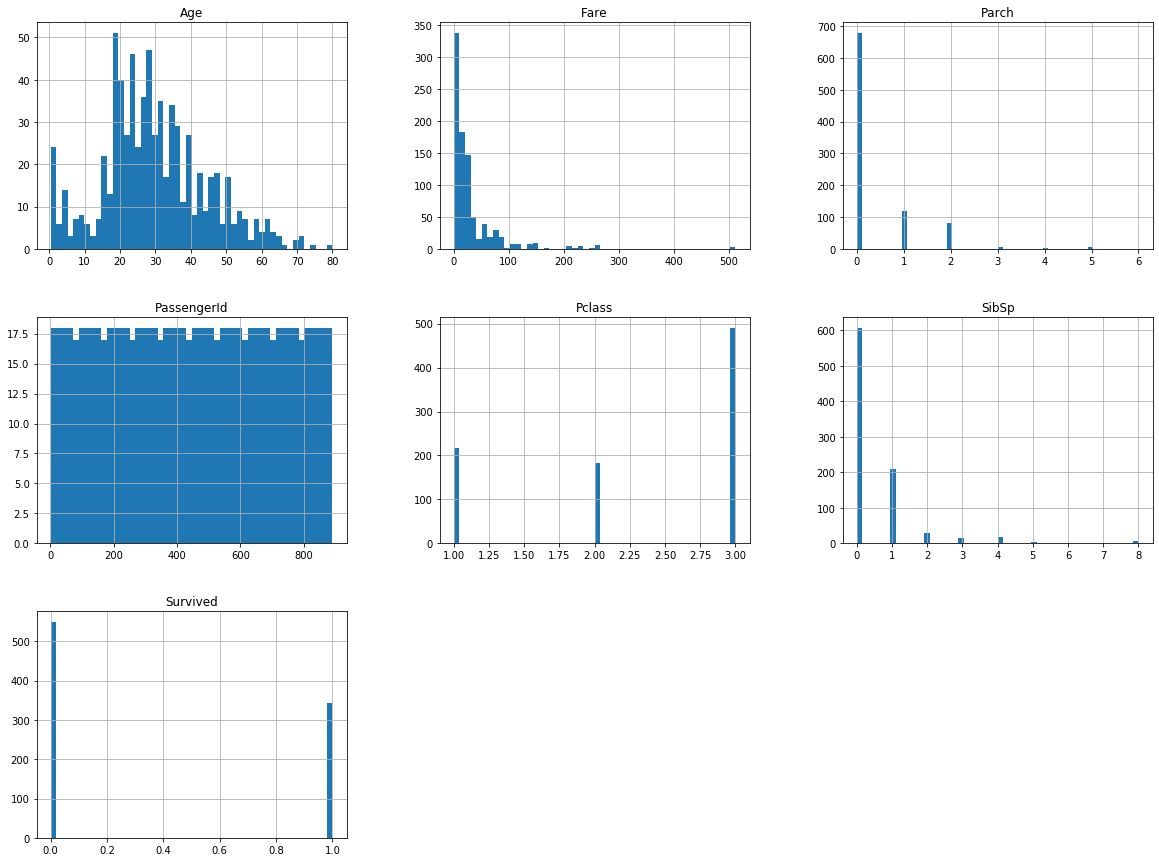

In [37]:
import matplotlib.pyplot as plt

train.hist(bins=50, figsize=(20,15))

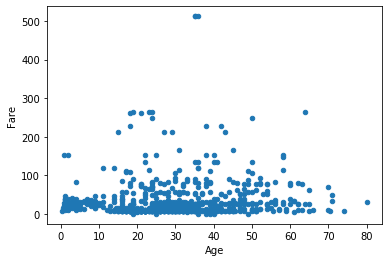

In [39]:
train.plot(kind="scatter", x="Age", y="Fare")

In [0]:
corr_matrix = train.corr()


In [41]:
# Survival is correlated to Fare price :) No shit sherlock :)
corr_matrix["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64